In [1]:
# Step 1: Install if needed (run once)
# !pip install yfinance pandas numpy matplotlib seaborn

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [2]:
# Step 3: Define tickers - NIFTY 50 example (or US tickers if preferred)
tickers = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS']

# Step 4: Download historical data
data = yf.download(tickers, start="2020-01-01", end="2024-12-31", group_by='ticker')


C:\Users\soumy\AppData\Local\Temp\ipykernel_26040\914789724.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-12-31", group_by='ticker')
[*********************100%***********************]  5 of 5 completed


In [3]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import seaborn as sns
sns.set(style='whitegrid')


In [5]:
tickers = ['INFY.NS', 'TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS']


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

# Step 1: Select tickers (Nifty 50 examples)
tickers = ['INFY.NS', 'TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS']

# Step 2: Download all price types (including 'Adj Close')
data = yf.download(tickers, start='2020-01-01', end='2024-01-01', group_by='ticker', auto_adjust=False)

# Step 3: Extract only 'Adj Close' prices from the data
adj_close = pd.DataFrame()

for ticker in tickers:
    adj_close[ticker] = data[ticker]['Adj Close']

# Step 4: Drop rows with any missing data
adj_close.dropna(inplace=True)

# Step 5: Show last few rows
adj_close.tail()


[*********************100%***********************]  5 of 5 completed


,INFY.NS,TCS.NS,RELIANCE.NS,HDFCBANK.NS,ITC.NS
Date,,,,,
2023-12-22,1502.513062,3727.584473,1278.186890,1648.341187,426.092743
2023-12-26,1484.295288,3699.852051,1284.664917,1659.784912,427.262787
2023-12-27,1506.550781,3715.107422,1289.050049,1680.354126,427.871277
2023-12-28,1502.272705,3704.092285,1298.368408,1682.277710,434.423615
2023-12-29,1483.286011,3697.756104,1288.103149,1686.223877,432.551514


In [7]:
# Step 1: Calculate 6-month returns (126 trading days)
momentum = adj_close.pct_change(126)

# Step 2: Take the latest row (most recent return)
latest_momentum = momentum.iloc[-1]

# Step 3: Rank stocks by momentum (higher return = higher rank)
momentum_rank = latest_momentum.rank(ascending=False)

# Step 4: Show scores
momentum_df = pd.DataFrame({
    '6M Return': latest_momentum,
    'Momentum Rank': momentum_rank
}).sort_values(by='Momentum Rank')

momentum_df


,6M Return,Momentum Rank
INFY.NS,0.230268,1.0
TCS.NS,0.195462,2.0
RELIANCE.NS,0.122236,3.0
HDFCBANK.NS,0.045061,4.0
ITC.NS,0.036796,5.0


In [8]:
# Step 1: Select top 3 momentum stocks
top_n = 3
top_momentum_stocks = momentum_df.nsmallest(top_n, 'Momentum Rank')
top_tickers = top_momentum_stocks.index.tolist()
print("Top momentum stocks:", top_tickers)


Top momentum stocks: ['INFY.NS', 'TCS.NS', 'RELIANCE.NS']


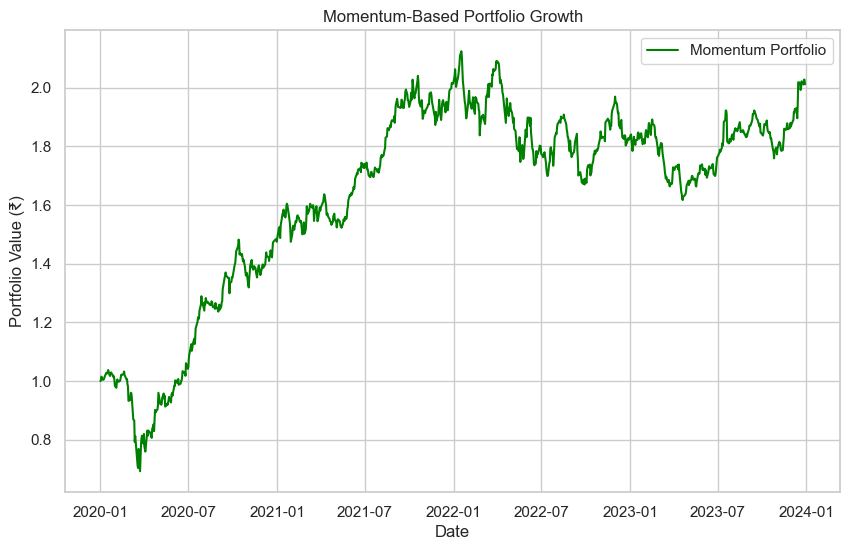

In [9]:
# Step 2: Create sub-data for selected stocks
portfolio_prices = adj_close[top_tickers]

# Step 3: Normalize prices to 1 (to simulate ₹1 investment in each)
normalized = portfolio_prices / portfolio_prices.iloc[0]

# Step 4: Simulate equally weighted portfolio
equal_weights = 1 / top_n
portfolio_value = normalized.dot([equal_weights] * top_n)

# Step 5: Plot the portfolio growth
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label='Momentum Portfolio', color='green')
plt.title('Momentum-Based Portfolio Growth')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Step 1: Calculate 6-month (126-day) volatility for each stock
volatility = adj_close.pct_change().rolling(126).std().iloc[-1]

# Step 2: Rank stocks by volatility (lower volatility = better rank)
vol_rank = volatility.rank(ascending=True)  # lower is better

# Step 3: Combine with Momentum
combined_df = pd.DataFrame({
    '6M Return': latest_momentum,
    'Momentum Rank': momentum_rank,
    'Volatility': volatility,
    'Volatility Rank': vol_rank
})

combined_df['Total Score'] = combined_df['Momentum Rank'] + combined_df['Volatility Rank']
combined_df['Final Rank'] = combined_df['Total Score'].rank()

# Sort by final rank
combined_df_sorted = combined_df.sort_values(by='Final Rank')
combined_df_sorted


,6M Return,Momentum Rank,Volatility,Volatility Rank,Total Score,Final Rank
HDFCBANK.NS,0.045061,4.0,0.009874,1.0,5.0,1.5
RELIANCE.NS,0.122236,3.0,0.010378,2.0,5.0,1.5
TCS.NS,0.195462,2.0,0.011968,4.0,6.0,3.5
INFY.NS,0.230268,1.0,0.014702,5.0,6.0,3.5
ITC.NS,0.036796,5.0,0.010761,3.0,8.0,5.0


In [11]:
# Step 1: Select top 3 stocks based on Final Rank
top_combined_stocks = combined_df_sorted.head(3)
top_combined_tickers = top_combined_stocks.index.tolist()
print("Top stocks based on 2-factor model:", top_combined_tickers)


Top stocks based on 2-factor model: ['HDFCBANK.NS', 'RELIANCE.NS', 'TCS.NS']


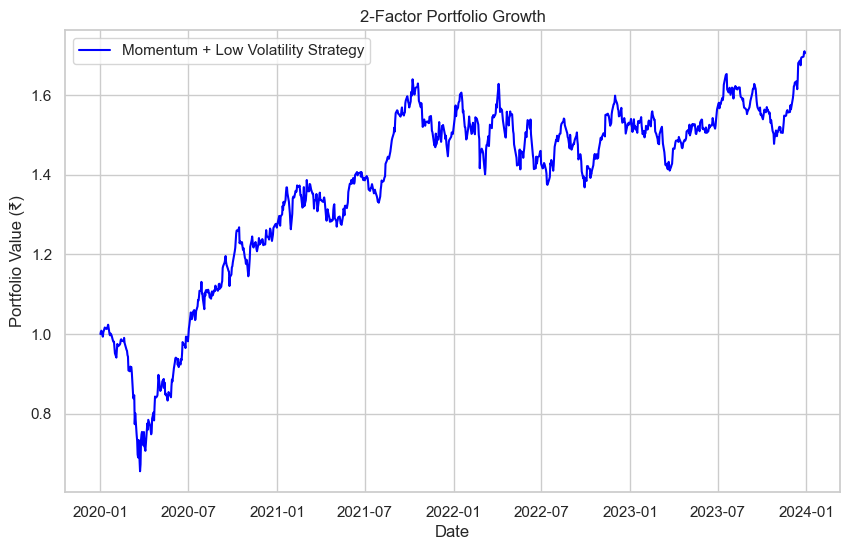

In [12]:
# Step 2: Create sub-data for selected stocks
final_prices = adj_close[top_combined_tickers]

# Step 3: Normalize prices to 1
normalized_final = final_prices / final_prices.iloc[0]

# Step 4: Simulate equally weighted portfolio
equal_weights = 1 / len(top_combined_tickers)
final_portfolio = normalized_final.dot([equal_weights] * len(top_combined_tickers))

# Step 5: Plot final portfolio
plt.figure(figsize=(10, 6))
plt.plot(final_portfolio, label='Momentum + Low Volatility Strategy', color='blue')
plt.title('2-Factor Portfolio Growth')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.show()
